In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('walmart_sales.csv')

In [3]:
df.shape

(1000, 17)

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# it show how data look mathematically
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
# Datatype of col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
#check missing value
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
#check duplicate value
df.duplicated().sum()

0

In [9]:
df['Gender'].value_counts()
df['Branch'].value_counts()
df['Product line'].value_counts()


Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Total'>

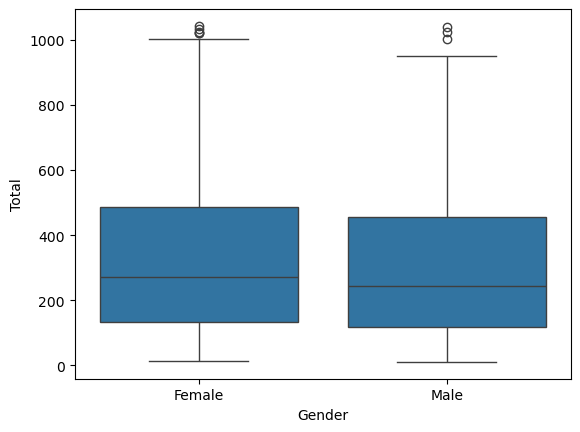

In [13]:
import seaborn as sns
sns.boxplot(x='Gender', y='Total', data=df)



<Axes: xlabel='Product line', ylabel='gross income'>

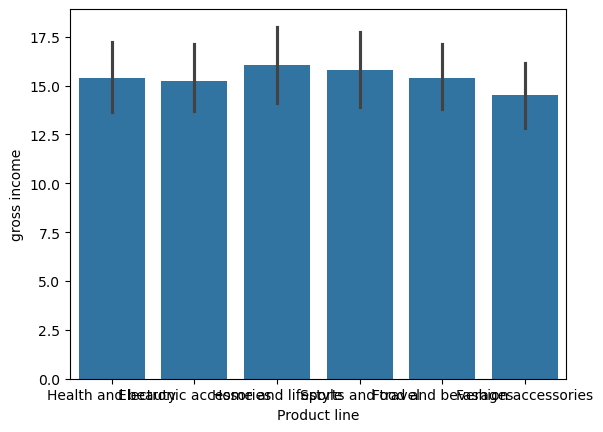

In [12]:
sns.barplot(x='Product line', y='gross income', data=df)

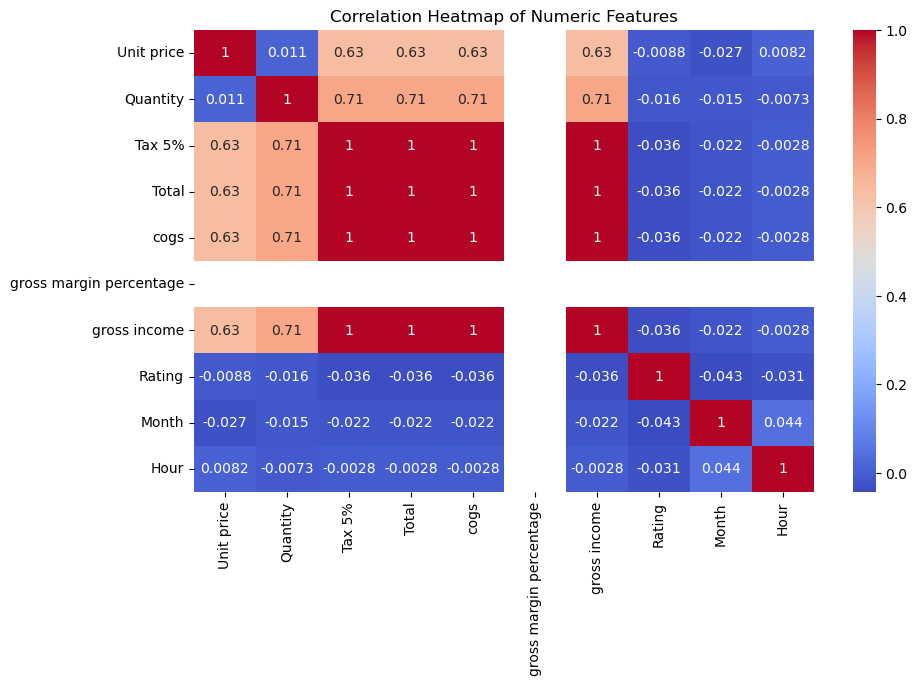

In [17]:
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_3416\3356880518.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='viridis')


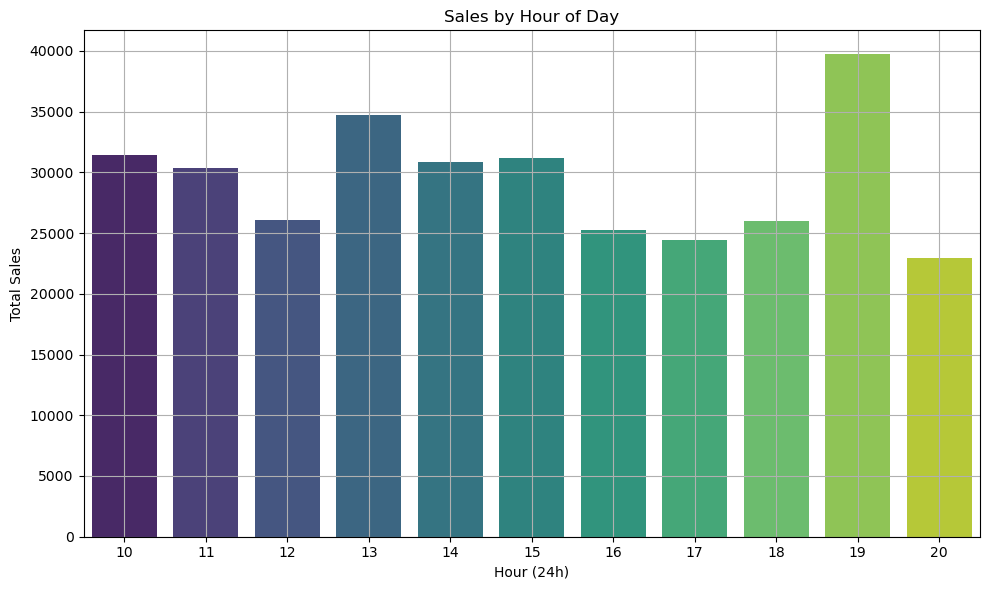

In [18]:
# Peak Shopping Hours
# Convert Time to datetime and extract hour
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Group by hour
hourly_sales = df.groupby('Hour')['Total'].sum()

# Plot
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='viridis')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour (24h)')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_3416\3621982547.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='Set2')


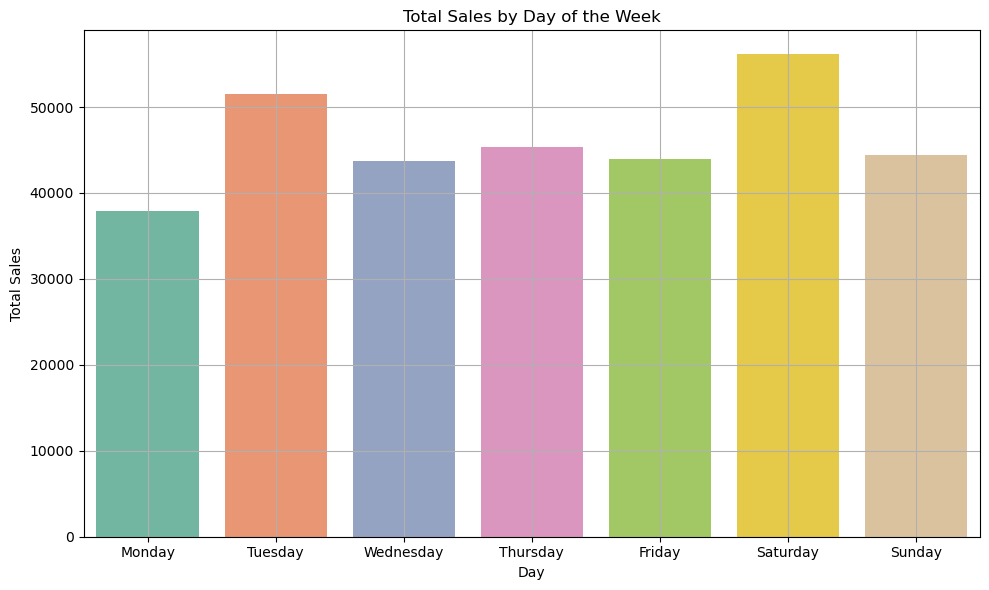

In [19]:
# Extract weekday
df['DayOfWeek'] = df['Date'].dt.day_name()

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day of week
weekday_sales = df.groupby('DayOfWeek')['Total'].sum().reindex(days_order)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='Set2')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_3416\1785988332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='Blues_r')


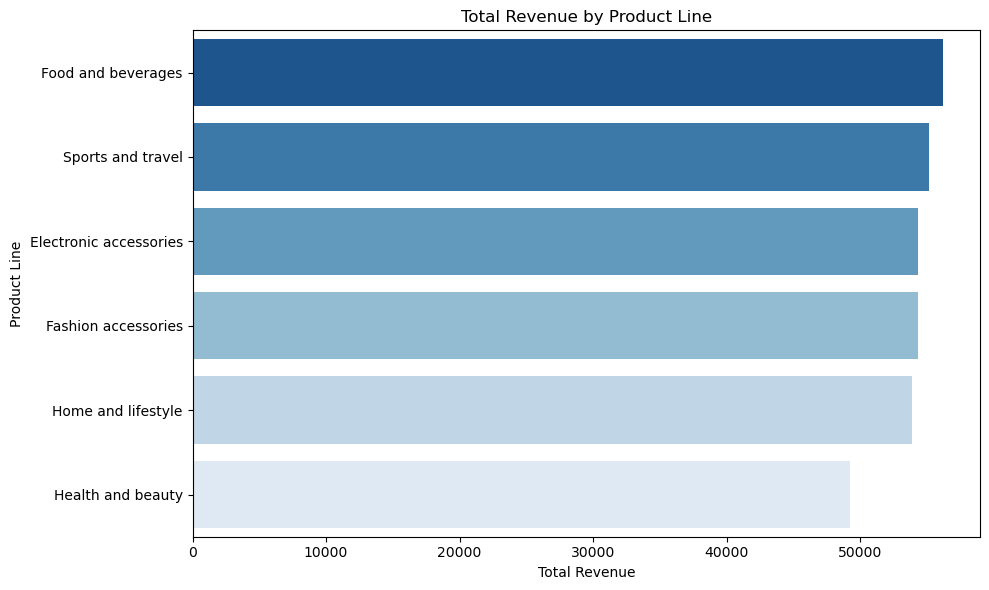

In [20]:
# Total revenue by product line
product_revenue = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='Blues_r')
plt.title('Total Revenue by Product Line')
plt.xlabel('Total Revenue')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_3416\481320926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='coolwarm')


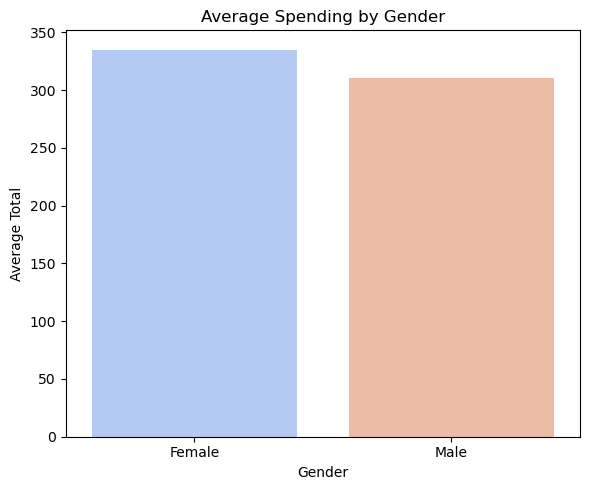

In [22]:
# Average total by gender
gender_sales = df.groupby('Gender')['Total'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='coolwarm')
plt.title('Average Spending by Gender')
plt.ylabel('Average Total')
plt.tight_layout()
plt.show()
